#Sante, Cedrick C.
#BSCpE-3

# Statsmodels Time Series Excercises
For this set of exercises we're using data from the Federal Reserve Economic Database (FRED) concerning the Industrial Production Index for Electricity and Gas Utilities from January 1970 to December 1989.

Data source: https://fred.stlouisfed.org/series/IPG2211A2N

<div class="alert alert-danger" style="margin: 10px"><strong>IMPORTANT NOTE!</strong> Make sure you don't run the cells directly above the example output shown, <br>otherwise you will end up writing over the example output!</div>

In [ ]:
# RUN THIS CELL
import pandas as pd
import numpy as np
%matplotlib inline

df = pd.read_csv('EnergyProduction.csv',index_col=0,parse_dates=True) # modify to fit your needs
df.head()

,EnergyIndex
DATE,
1970-01-01,43.0869
1970-02-01,42.5577
1970-03-01,41.6215
1970-04-01,40.1982
1970-05-01,39.9321


### 1. Assign a frequency of 'MS' to the DatetimeIndex.

In [ ]:
# CODE HERE
df.index.freq='MS'
df.index



DatetimeIndex(['1970-01-01', '1970-02-01', '1970-03-01', '1970-04-01',
               '1970-05-01', '1970-06-01', '1970-07-01', '1970-08-01',
               '1970-09-01', '1970-10-01',
               ...
               '1989-03-01', '1989-04-01', '1989-05-01', '1989-06-01',
               '1989-07-01', '1989-08-01', '1989-09-01', '1989-10-01',
               '1989-11-01', '1989-12-01'],
              dtype='datetime64[ns]', name='DATE', length=240, freq='MS')

In [ ]:
# DON'T WRITE HERE

DatetimeIndex(['1970-01-01', '1970-02-01', '1970-03-01', '1970-04-01',
               '1970-05-01', '1970-06-01', '1970-07-01', '1970-08-01',
               '1970-09-01', '1970-10-01',
               ...
               '1989-03-01', '1989-04-01', '1989-05-01', '1989-06-01',
               '1989-07-01', '1989-08-01', '1989-09-01', '1989-10-01',
               '1989-11-01', '1989-12-01'],
              dtype='datetime64[ns]', name='DATE', length=240, freq='MS')

### 2. Plot the dataset.

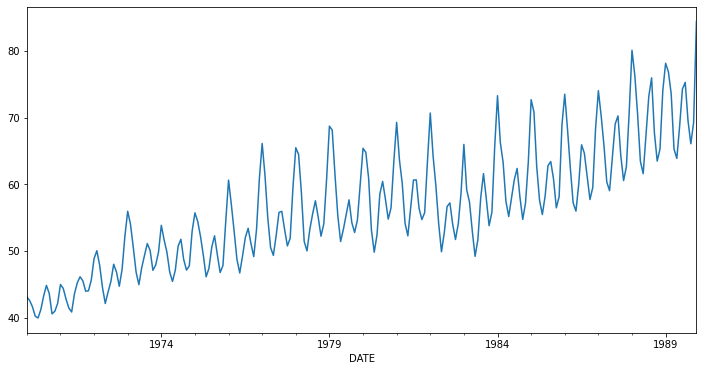

In [ ]:
# CODE HERE
df['EnergyIndex'].plot(figsize = (12,6))


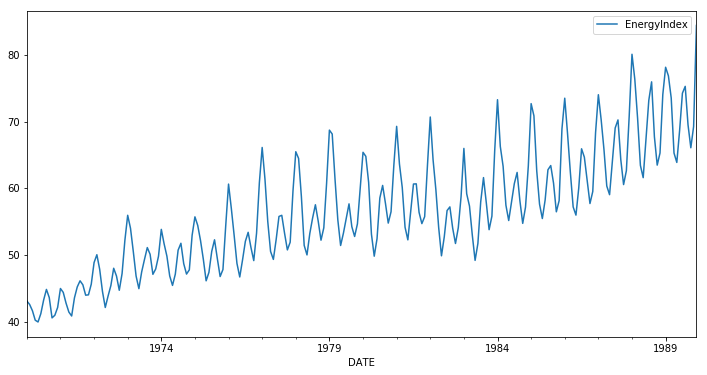

In [ ]:
# DON'T WRITE HERE

### 3. Add a column that shows a 12-month Simple Moving Average (SMA).<br>&nbsp;&nbsp;&nbsp;&nbsp;Plot the result.

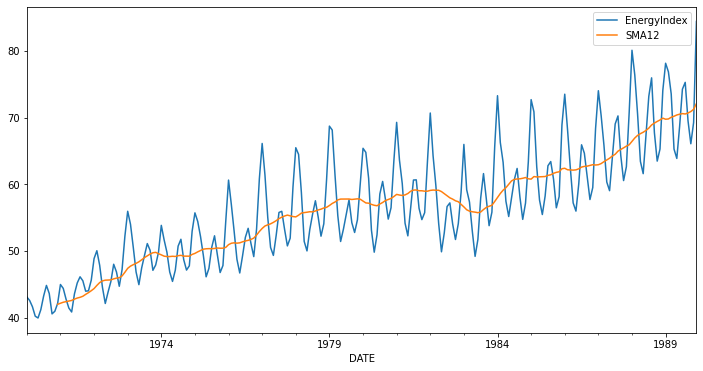

In [ ]:
df['SMA12'] = df['EnergyIndex'].rolling(window=12).mean()
df[['EnergyIndex', 'SMA12']].plot(figsize = (12,6))


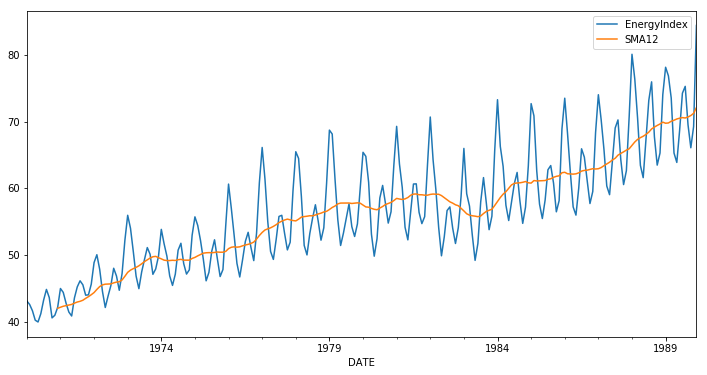

In [ ]:
# DON'T WRITE HERE

### 4. Add a column that shows an Exponentially Weighted Moving Average (EWMA) with a span of 12 using the statsmodels <tt>SimpleExpSmoothing</tt> function. Plot the result.

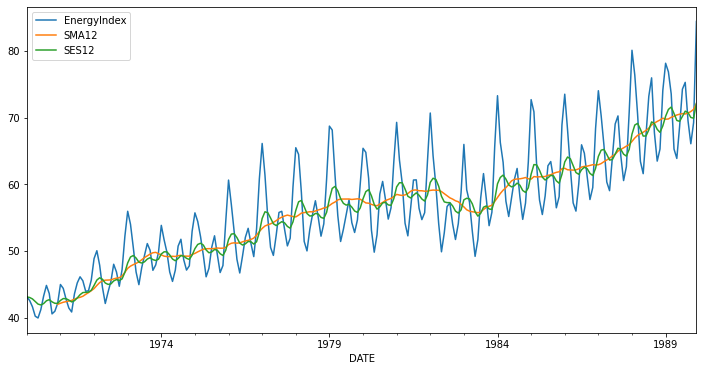

In [ ]:
# DON'T FORGET TO PERFORM THE IMPORT!
df['SES12'] = df['EnergyIndex'].ewm(span=12, adjust=False).mean()
df[['EnergyIndex', 'SMA12', 'SES12']].plot(figsize = (12,6))



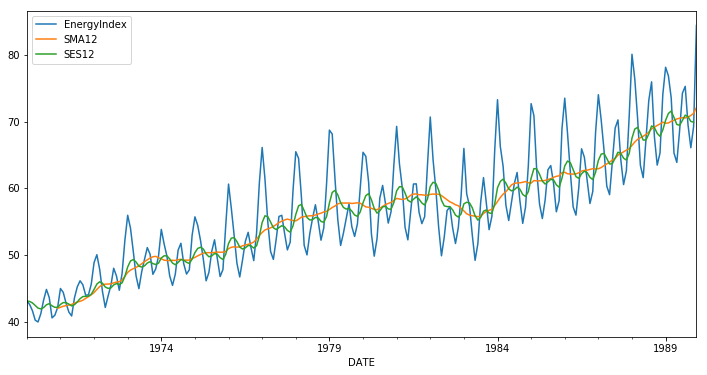

In [ ]:
# DON'T WRITE HERE

### 5. Add a column to the DataFrame that shows a Holt-Winters fitted model using Triple Exponential Smoothing with multiplicative models. Plot the result.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


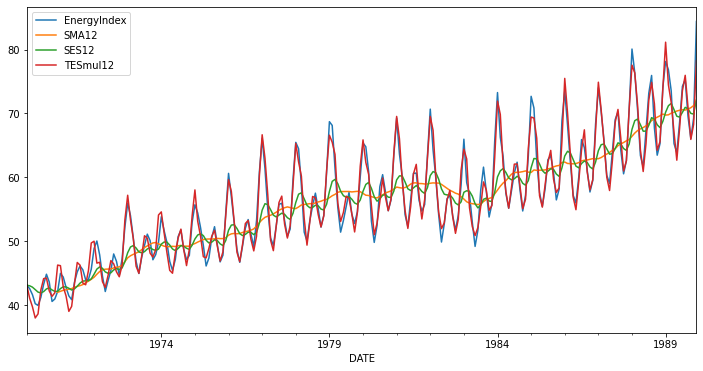

In [ ]:
# DON'T FORGET TO PERFORM THE IMPORT!
from statsmodels.tsa.holtwinters import ExponentialSmoothing

df['TESmul12'] = ExponentialSmoothing(df['EnergyIndex'], trend='mul', seasonal='mul', seasonal_periods=12).fit().fittedvalues
df[['EnergyIndex', 'SMA12', 'SES12', 'TESmul12']].plot(figsize = (12,6))

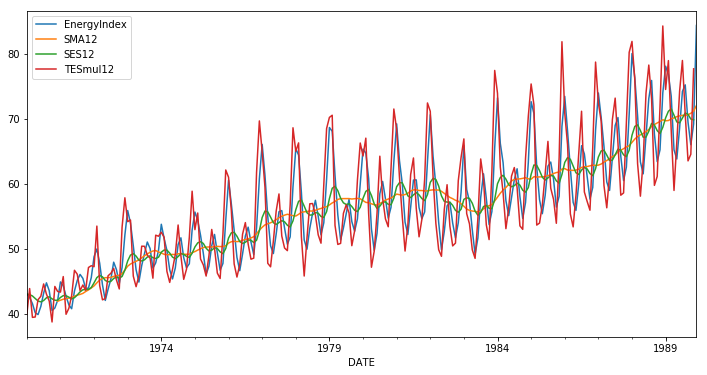

In [ ]:
# DON'T WRITE HERE

### OPTIONAL: Plot the same  as above, but for only the first two years.

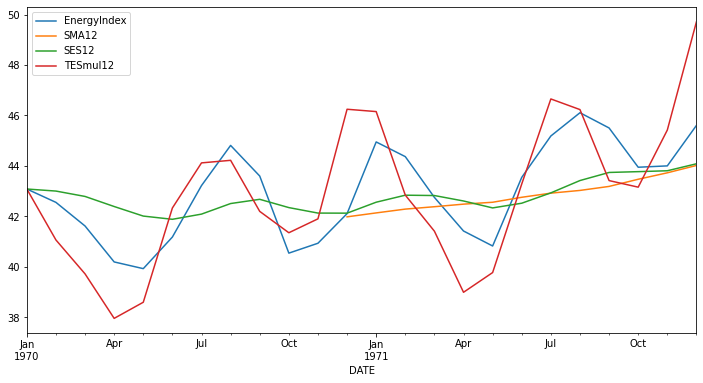

In [ ]:
df[['EnergyIndex', 'SMA12', 'SES12', 'TESmul12']].iloc[:24].plot(figsize = (12,6))

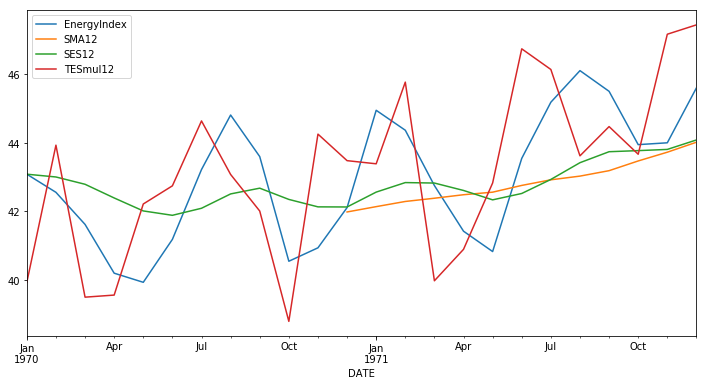

In [ ]:
# DON'T WRITE HERE

### BONUS QUESTION: There is a visible decline in the Industrial Production Index around 1982-1983.<br>Why do you think this might be? Google is the key.

### -Because of the Early 1980s Recession or "Global Recession of 1982" as termed by World Bank, started by 1979 energy crisis, that is mostly caused by the Iranian Revolution which caused a disruption to the global oil supply, and tightening of G7 countries' monetary policies by increasing interest rates in order to control the inflation (Wikipedia.org, n.d.).

## Great job!